In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
class Tpoo():
    
    
    def __init__(self,path):
        
        try:
            self.data = pd.read_csv(path,sep=';')
        except ParserError:
             self.data = pd.read_csv(path,sep=',')
    
    def All_da(self):
        #Grouper les modules par nombre d'actor
        serieNbActor = pd.Series(self.data.groupby('object_id').actor.nunique()).rename('NbActor')
#Grouper par module en precisant le nombre de cession
        serieNbCession = pd.Series(self.data.groupby('object_id').session_uuid.count()).rename('NbCession')
##Grouper les modules par score maximum
        serieMaxScore = pd.Series(self.data.groupby('object_id').score.max()).rename('MaxScore')
#Grouper les modules par score minimum
        serieMinScore = pd.Series(self.data.groupby('object_id').score.min()).rename('MinScore')
#Grouper les modules par score >= 50
        serieNbActor50 = self.data[(self.data['score'] >= 50)].groupby(['object_id']).actor.nunique().rename('NbActor50')
#Calcul du taux de reussite
        serieTauxReussite = (serieNbActor50/serieNbActor)*100
        serieTauxReussite =serieTauxReussite.rename('TauxReussite')
#Concatenation des resultats ci-dessus
        resultatFinal = pd.concat([serieNbActor,serieNbCession,serieMinScore,serieMaxScore,serieTauxReussite],axis=1)
#Trier le resultat final par ordre decroissante
        resultatFinalTout = resultatFinal.sort_values(by=['TauxReussite'],ascending=False)
        resultatFinalTout.TauxReussite = resultatFinalTout.TauxReussite.fillna(0)
        self.res = resultatFinalTout
        return resultatFinalTout
    
    
    def Top_mod(self,nb):
        
        self.All_da()
        resultatFinalTop10 = self.res.head(nb)
        return resultatFinalTop10
    
#import numpy as np

    def To_nump(self,dat):
        
        resultatFinalTop10Numpy = dat.to_numpy()
        return resultatFinalTop10Numpy

    def Mod_aff(self,df2,x):
        nbCessionActorTop = data[(data['object_id'] == df2.index[x] )].groupby('actor').session_uuid.count().rename('NbCession')
        nbTempsActorTop = round(data[(data['object_id'] == df2.index[x] )].groupby('actor').temps.sum().rename('NbTemp')/60,2)
        nbScoreActorTop = data[(data['object_id'] == df2.index[x])].groupby('actor').score.max().rename('NbScore')

        data2Top = pd.concat([nbCessionActorTop,nbTempsActorTop,nbScoreActorTop], axis = 1)
#Création et attribution du resultat final de chaque apprenant
        data2Top = data2Top.assign(ResultatFinal=0)
        data2Top.loc[data2Top['NbScore'] >= 50, 'ResultatFinal'] = 1
        print("module :",df2.index[x])
        return data2Top

    
    def Graph(self,t):
        plt.figure(figsize=(15,10))
        for i in range(len(t.index)):
            nbTemps = round(self.data[(self.data['object_id'] == t.index[i] )].groupby('actor').temps.sum().rename('NbTemp')/60,2)
            nbScore = self.data[(self.data['object_id'] == t.index[i] )].groupby('actor').score.max().rename('NbScore')
            d = pd.concat([nbTemps,nbScore],axis=1)
            d = d.sort_values(by=['NbTemp'],ascending=False)
            plt.plot(d.NbTemp,d.NbScore,label=t.index[i])
            plt.legend()

    def Graph_sub(self,t):
        
        
        plt.figure(figsize=(15,10))
        for i in range(len(t.index)):
            nbScore = self.data[(self.data['object_id'] == t.index[i] )].groupby('actor').score.max().rename('NbScore')
            d = pd.DataFrame({"sco":nbScore})
            d = d.sort_values(by=['sco'],ascending=False)
            
            rang=list(range(1,len(d.sco)+1))
            plt.subplot(len(t.index),1,i+1)
            plt.plot(rang,d.sco,label=t.index[i])
            plt.legend()
            plt.xlabel('rang')
            plt.ylabel('score')
            
            
    def Graph_scat(self):
        
        nbTemps = round(self.data.groupby('object_id').temps.sum()/60,2)
        d = pd.DataFrame({"t":nbTemps})
        plt.figure(figsize=(15,10))
        plt.scatter(d.index,d.t)
        plt.xticks(rotation='vertical')
        plt.xlabel('module')
        plt.ylabel('temp')
        
        
    def Graph_tart(self):
        self.All_da()
        classeA = (len(self.res[self.res['TauxReussite']>=80])/len(self.res))*100
        classeB = (len(self.res.loc[(self.res['TauxReussite']>=60) & (self.res['TauxReussite']<80)])/len(self.res))*100
        classeC = (len(self.res.loc[(self.res['TauxReussite']>=50) & (self.res['TauxReussite']<60)])/len(self.res))*100
        classeD = (len(self.res.loc[(self.res['TauxReussite']<50)])/len(self.res))*100
        c = [classeA,classeB,classeC,classeD]
        lb = ['classeA','classeB','classeC','classeD']
        plt.pie(c, labels = lb,autopct='%1.2f%%')




module : 819-informatique


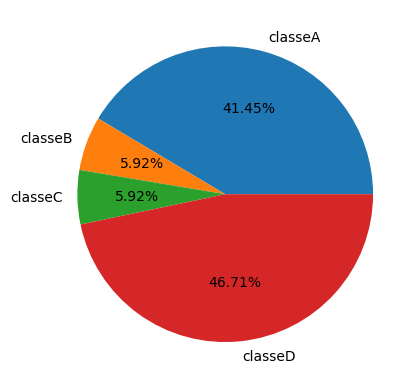

In [177]:
d=Tpoo('tp.csv')
c = d.Top_mod(3)
t1= d.To_nump(c)
d.Mod_aff(c,-1)
d.Graph_tart()

In [139]:
from pandas.errors import ParserError

In [96]:
try:
    data = pd.read_csv("tp.csv",sep=';')
except ParserError:
    print("erreur de separateur")